In [8]:
import os, sys
import pandas as pd
LIBpath = os.path.join( os.getenv('HOME'),'src','kitchensinkGT', 'LIB')
sys.path.append(LIBpath)
from libMVO import correct_nslc
from obspy.core import read

df = pd.read_csv('02_index_wavfile_original_traceID.csv',index_col=False)
print(df)

# change/test correct_nslc and see if newID different than corrected_id
df['newID'] = ''  
for i,row in df.iterrows():
    df.loc[i,'newID']=correct_nslc(row['original_id'], 75.0)
df2 = df[['original_id','corrected_id','newID']].drop_duplicates()
df2.reset_index(inplace=True,drop=True)
with pd.option_context("display.min_rows", 50, "display.max_rows", 200, \
                       "display.max_columns", 15, 'display.max_colwidth', 150):
    display(df2)

                                                    wav  original_id  \
0     /Users/gt/DATA/MVO/WAV/MVOE_/1996/10/9610-28-0...  .MBGA.J.SBZ   
1     /Users/gt/DATA/MVO/WAV/MVOE_/1996/10/9610-28-0...  .MBGA.J.SBN   
2     /Users/gt/DATA/MVO/WAV/MVOE_/1996/10/9610-28-0...  .MBGA.J.SBE   
3     /Users/gt/DATA/MVO/WAV/MVOE_/1996/10/9610-28-0...  .MBLG.J.S Z   
4     /Users/gt/DATA/MVO/WAV/MVOE_/1996/10/9610-28-0...  .MBLG.J.A N   
...                                                 ...          ...   
1428  /Users/gt/DATA/MVO/WAV/MVOE_/1999/12/9912-10-2...  .MBMH.J.S Z   
1429  /Users/gt/DATA/MVO/WAV/MVOE_/1999/12/9912-10-2...  .MBMH.J.S N   
1430  /Users/gt/DATA/MVO/WAV/MVOE_/1999/12/9912-10-2...  .MBMH.J.S E   
1431  /Users/gt/DATA/MVO/WAV/MVOE_/1999/12/9912-10-2...  .MBLG.J.S Z   
1432  /Users/gt/DATA/MVO/WAV/MVOE_/1999/12/9912-10-2...  .MBLG.E.PRS   

      corrected_id  
0     MV.MBGA..BHZ  
1     MV.MBGA..BHN  
2     MV.MBGA..BHE  
3     MV.MBLG..SHZ  
4     MV.MBLG..SNZ  
...      

,original_id,corrected_id,newID
0,.MBGA.J.SBZ,MV.MBGA..BHZ,MV.MBGA..BHZ
1,.MBGA.J.SBN,MV.MBGA..BHN,MV.MBGA..BHN
2,.MBGA.J.SBE,MV.MBGA..BHE,MV.MBGA..BHE
3,.MBLG.J.S Z,MV.MBLG..SHZ,MV.MBLG..SHZ
4,.MBLG.J.A N,MV.MBLG..SNZ,MV.MBLG..SNZ
5,.MBRY.J.S Z,MV.MBRY..SHZ,MV.MBRY..SHZ
6,.MBRY.J.A N,MV.MBRY..SNZ,MV.MBRY..SNZ
7,.MBGE.J.SBZ,MV.MBGE..BHZ,MV.MBGE..BHZ
8,.MBGE.J.SBN,MV.MBGE..BHN,MV.MBGE..BHN
9,.MBGE.J.SBE,MV.MBGE..BHE,MV.MBGE..BHE


.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


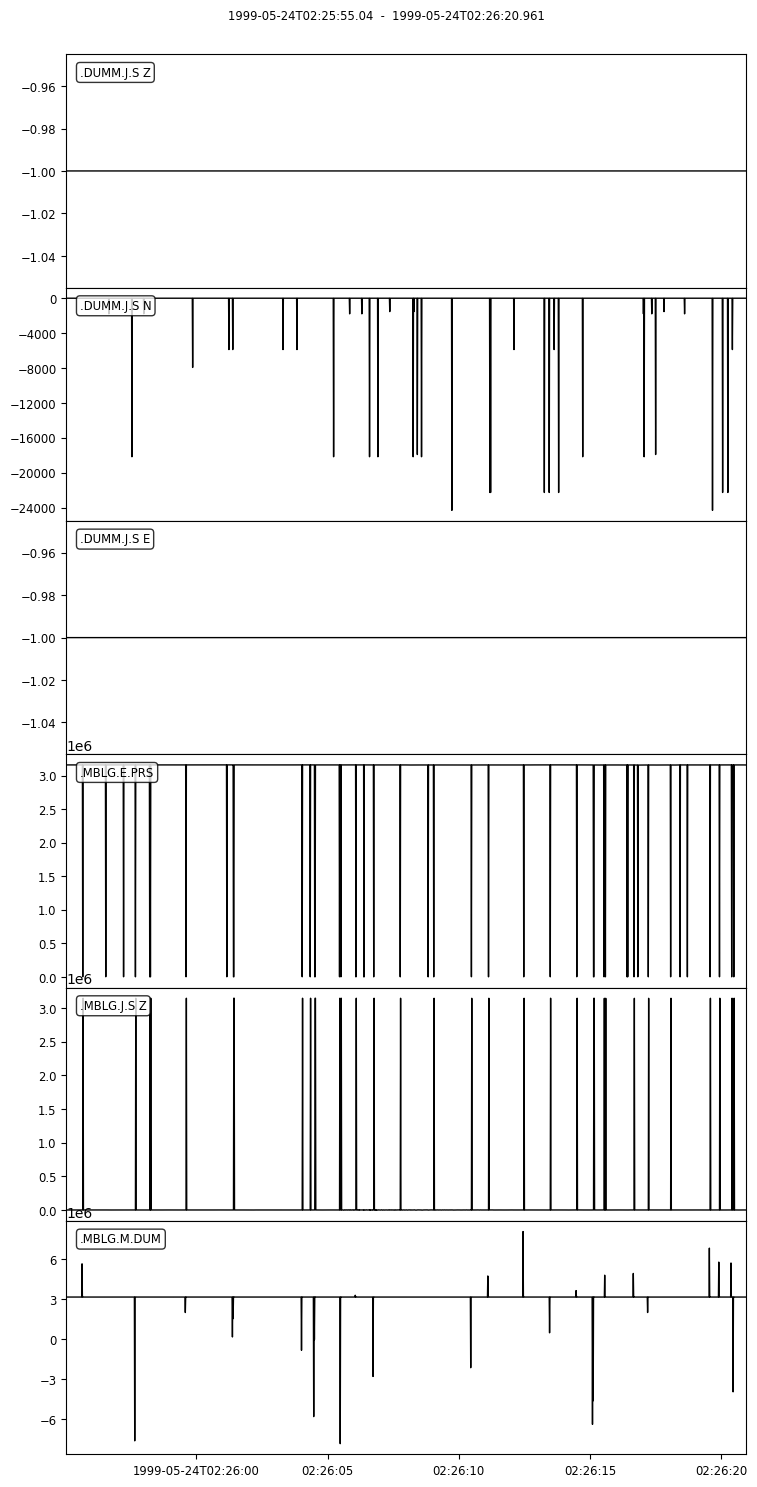

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


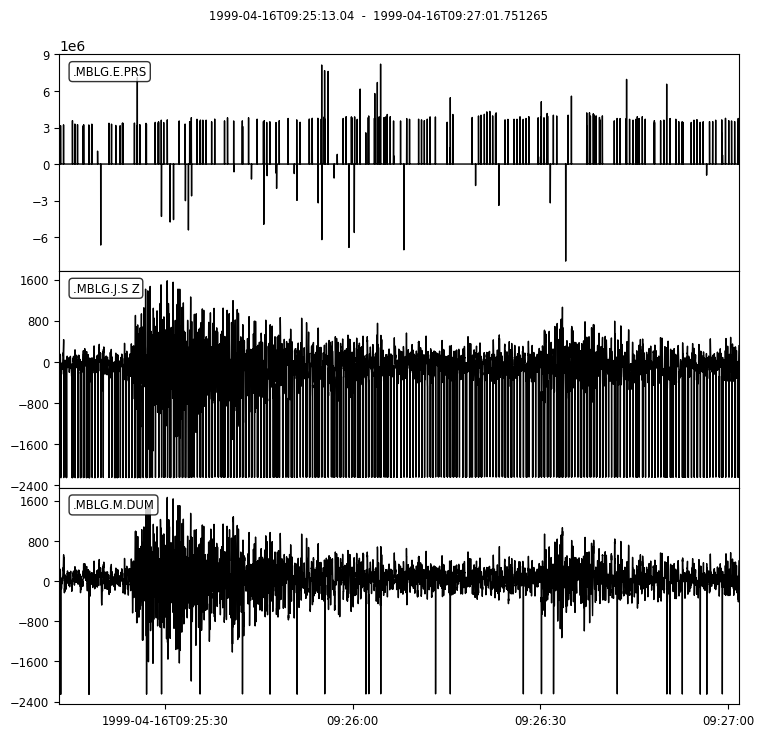

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


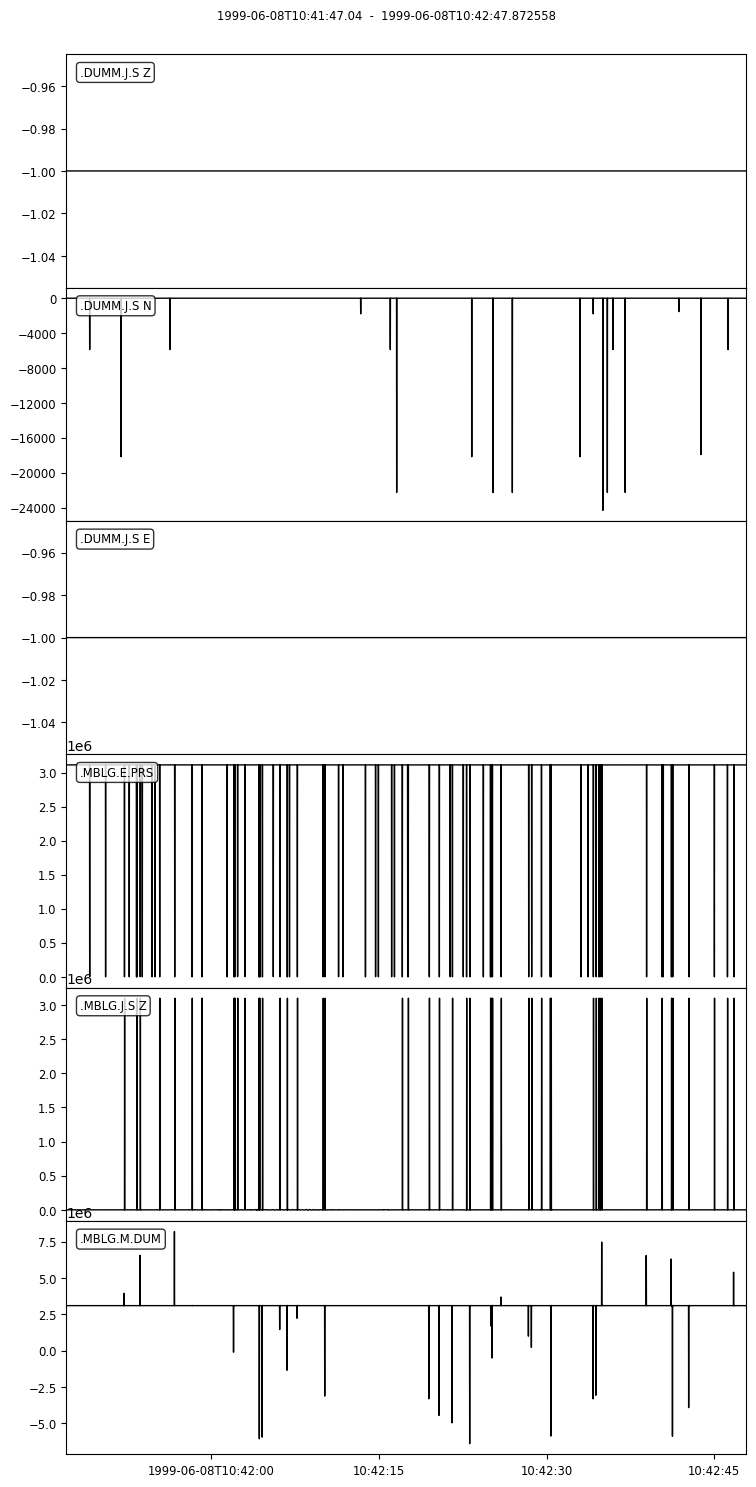

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


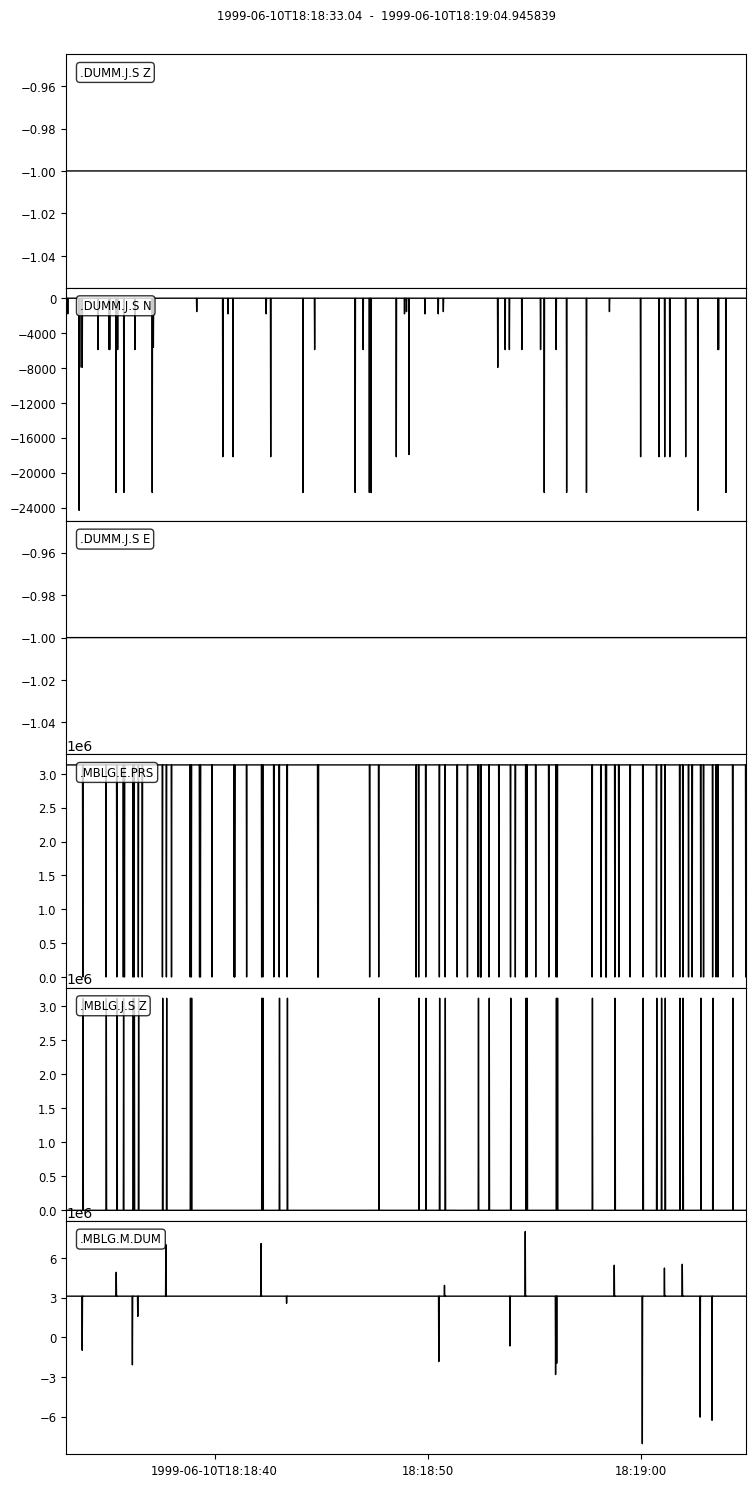

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


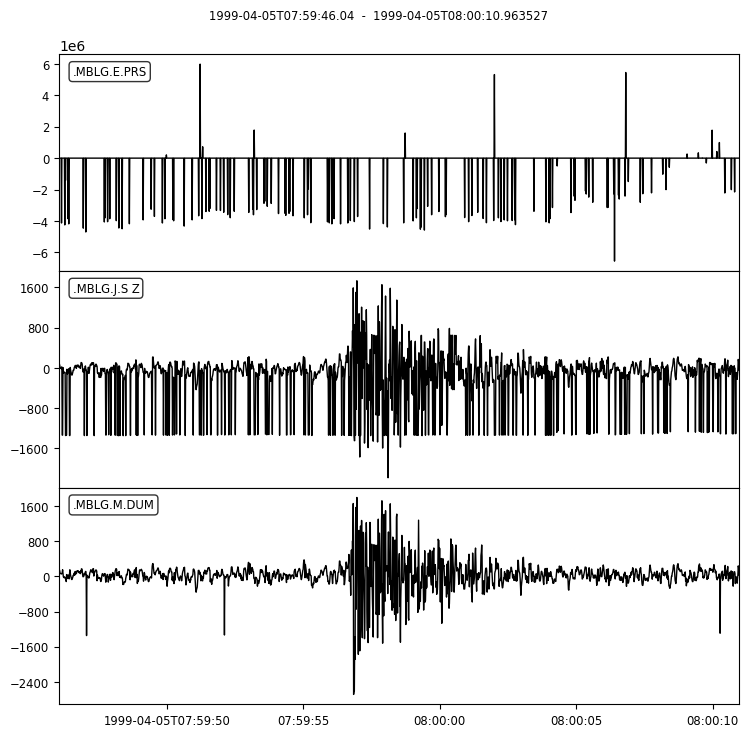

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


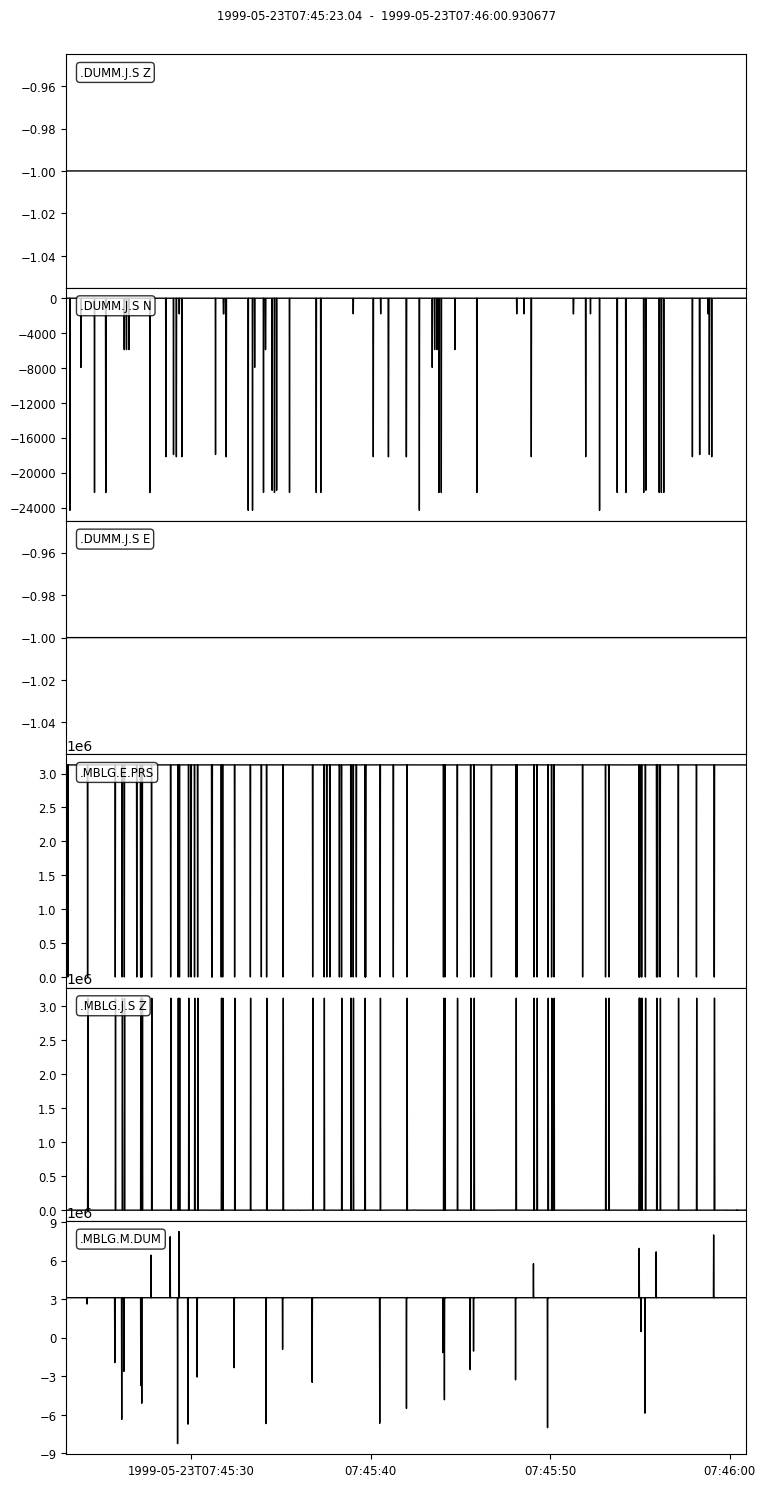

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


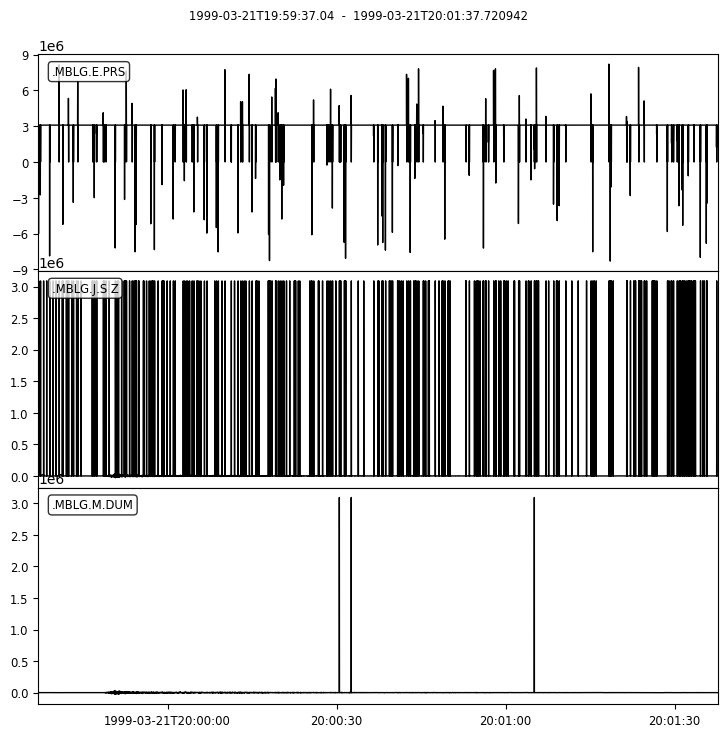

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


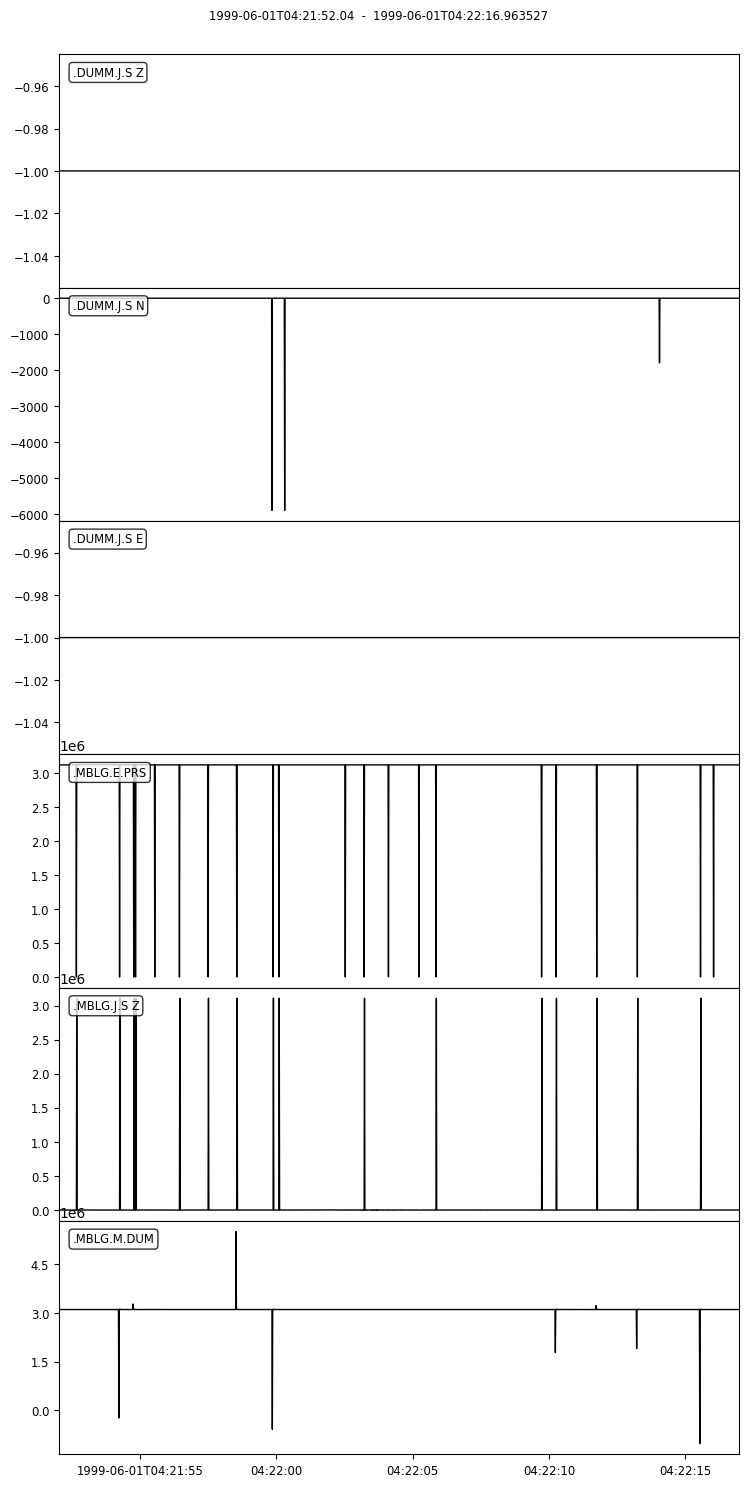

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


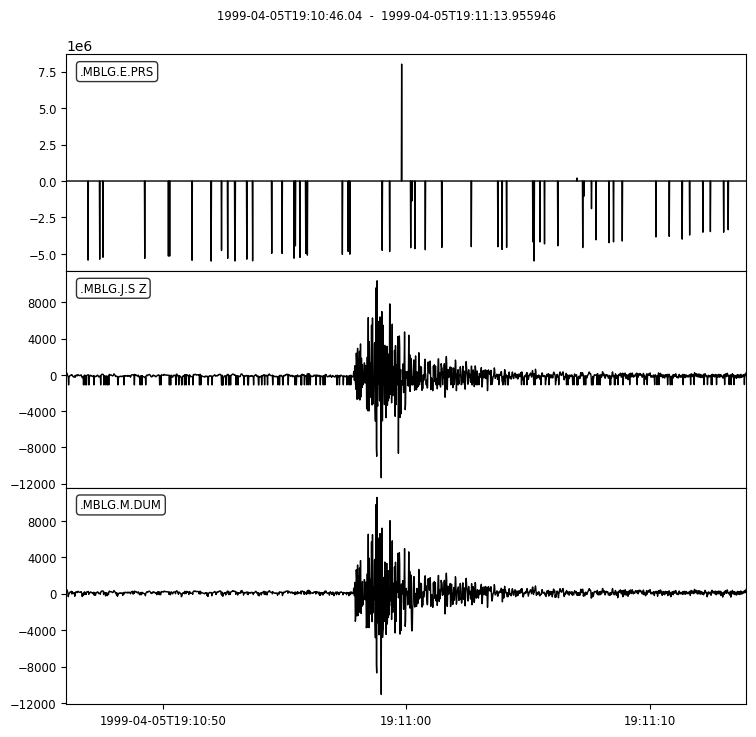

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


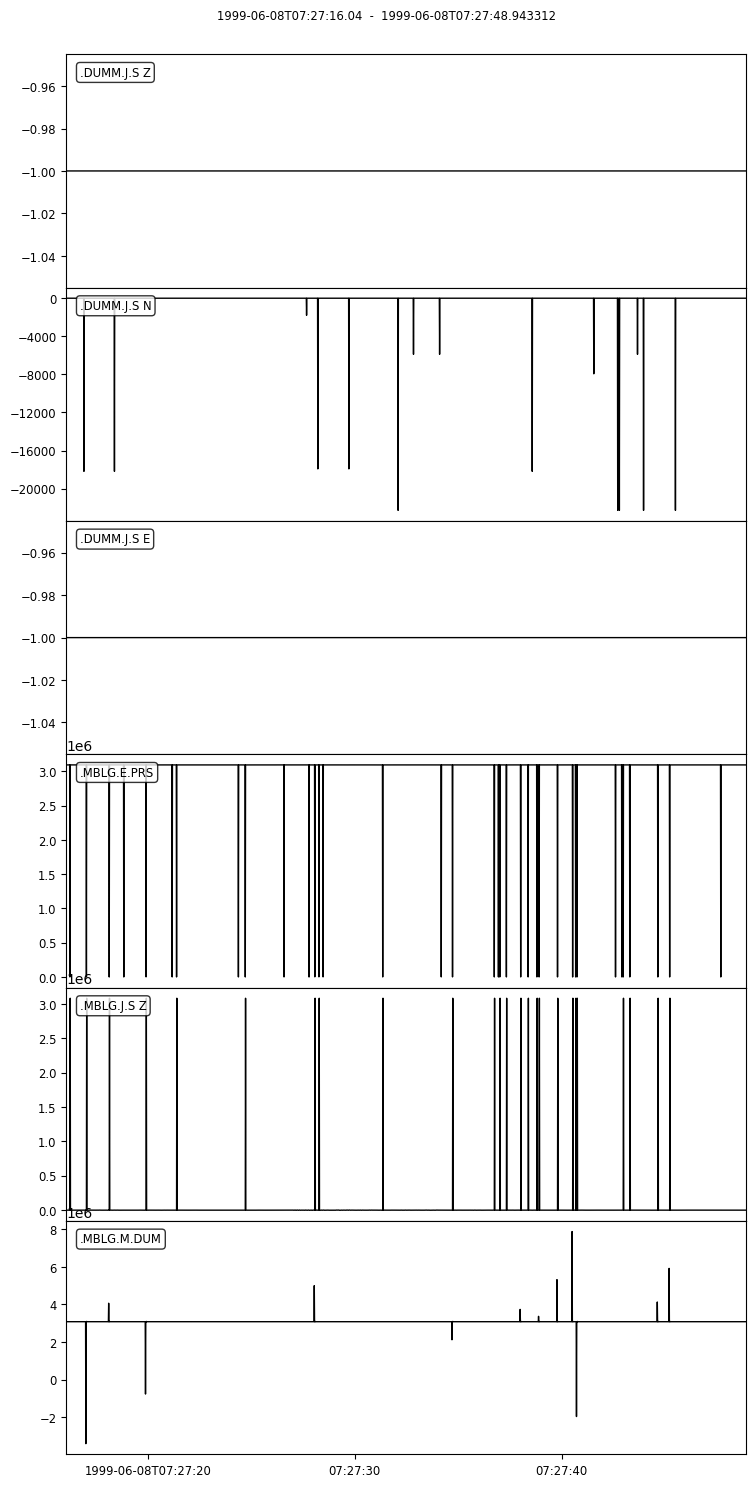

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


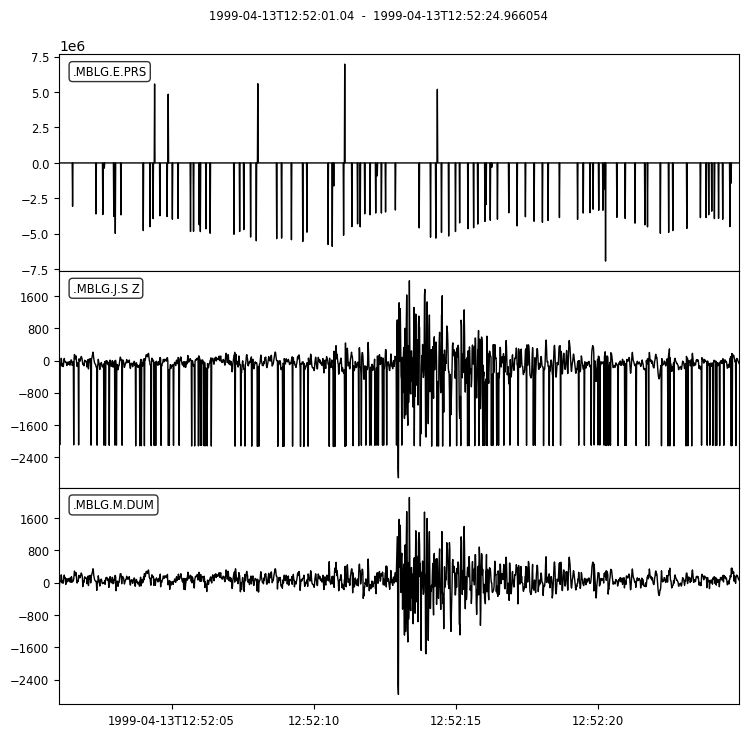

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


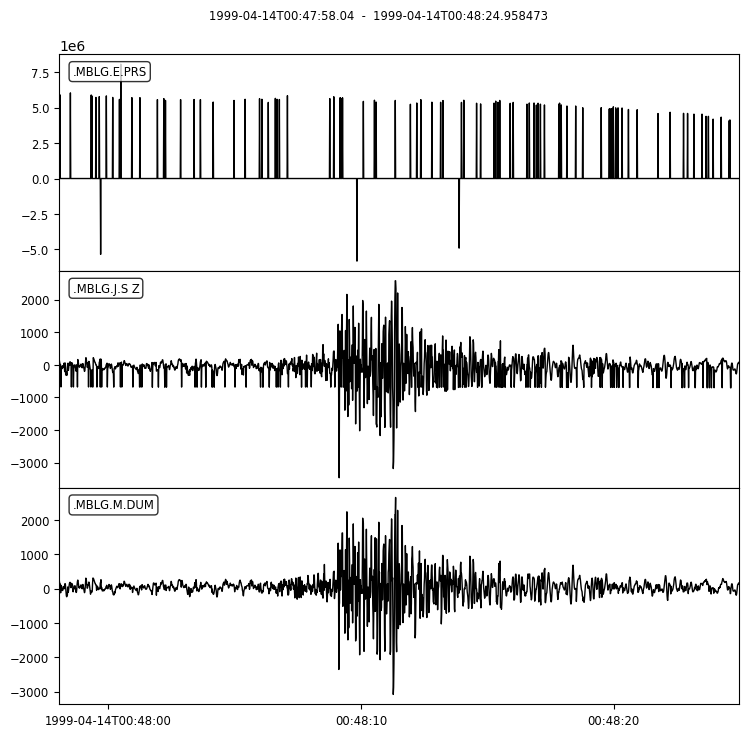

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


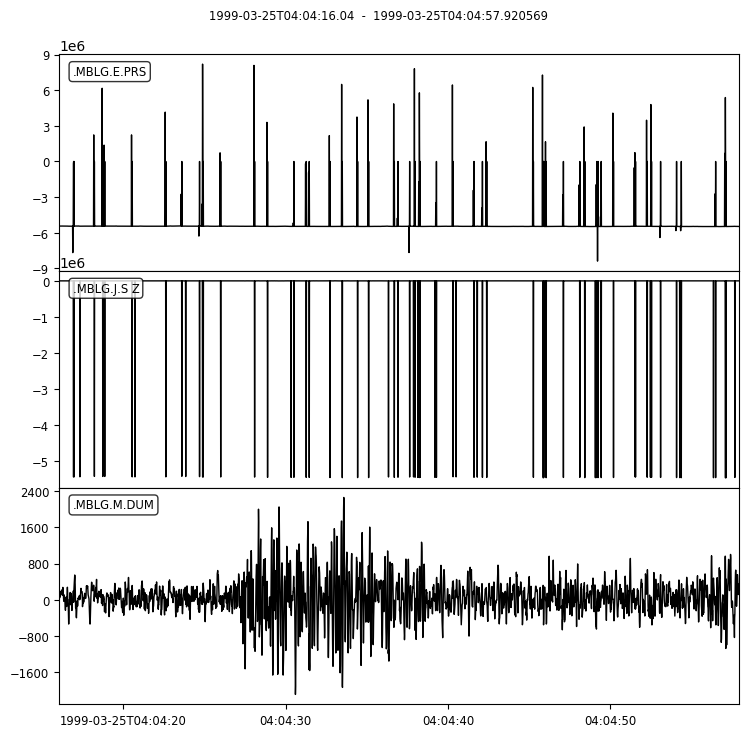

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


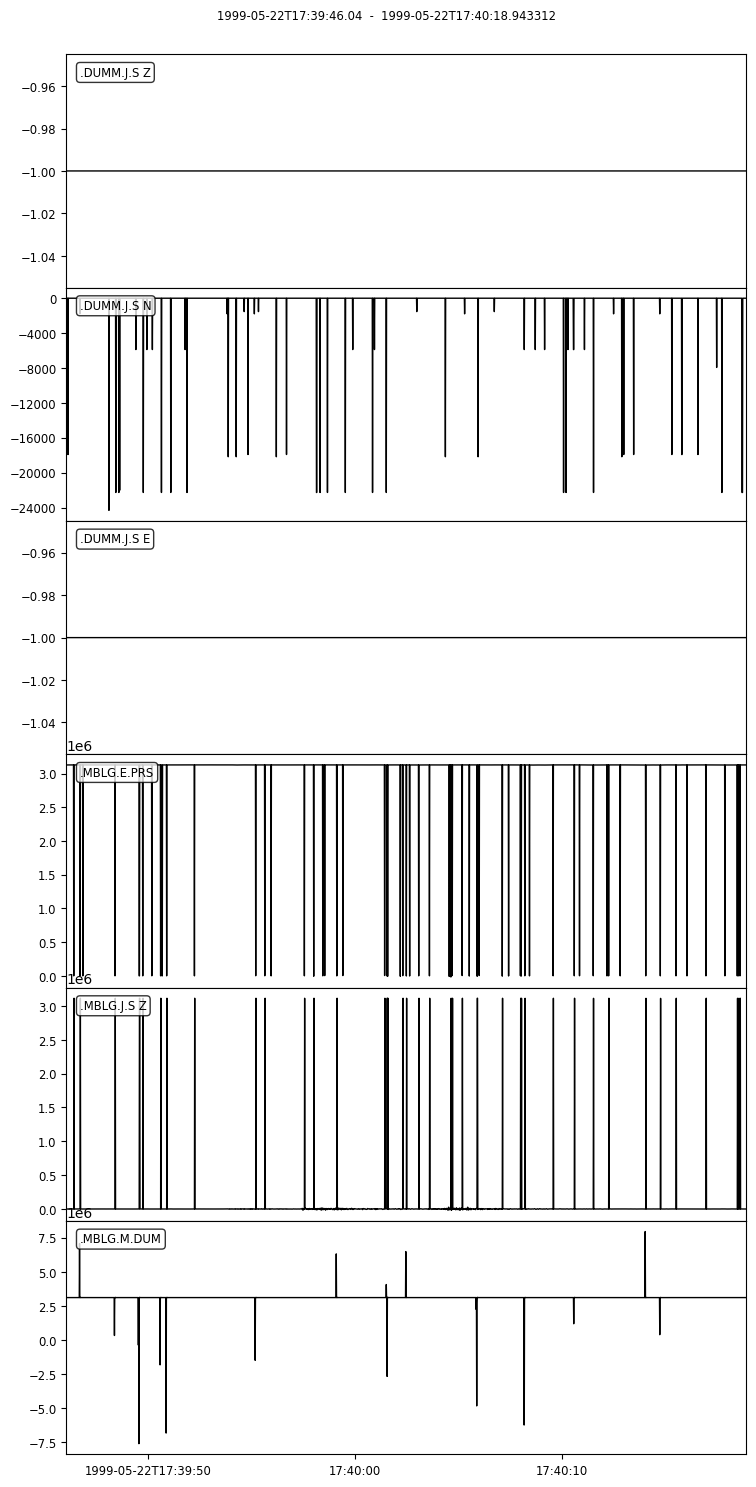

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


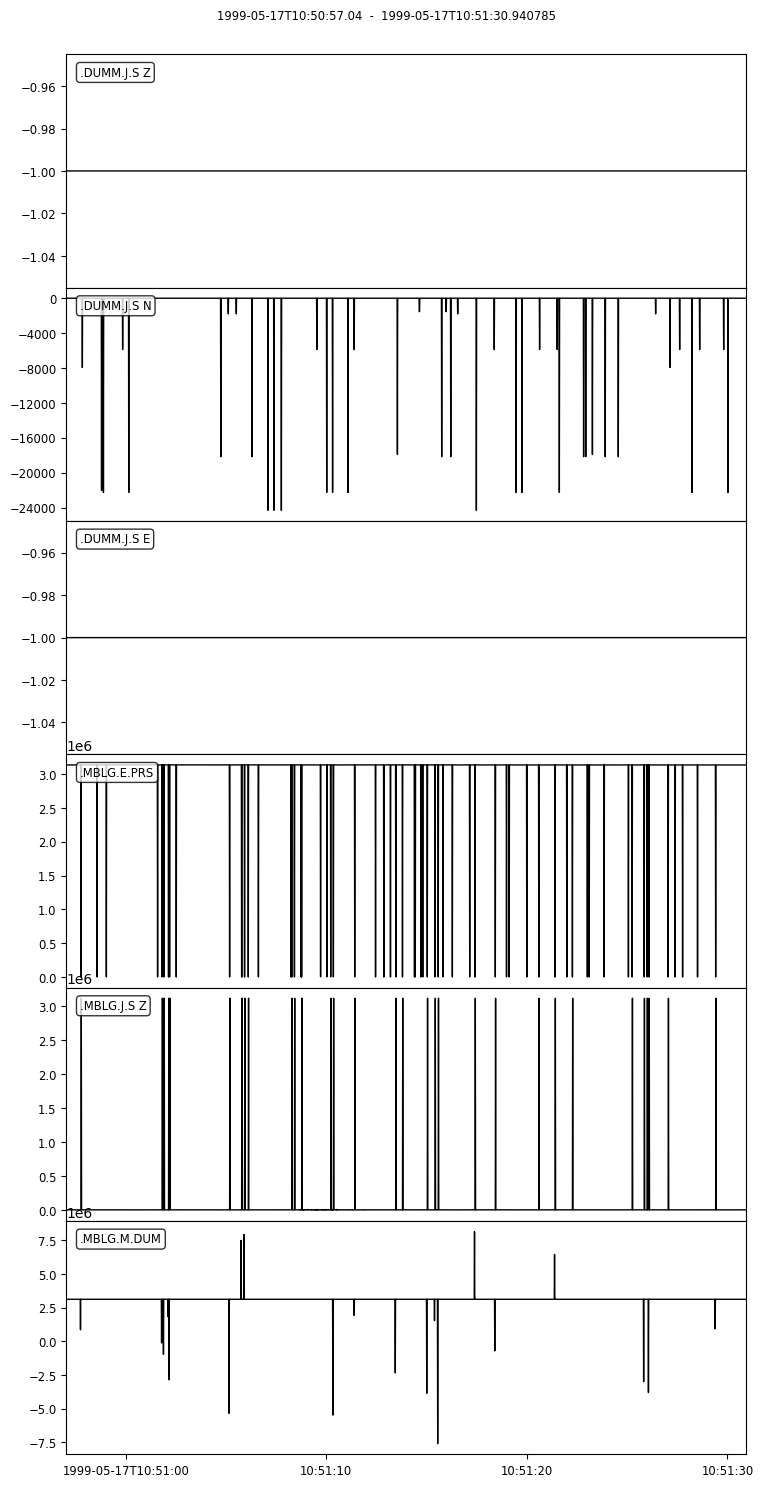

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


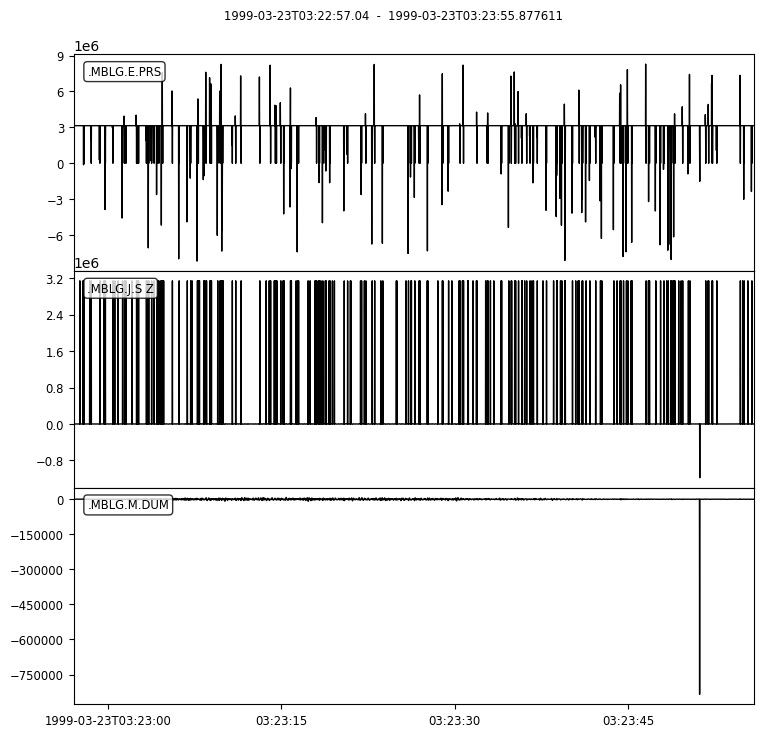

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


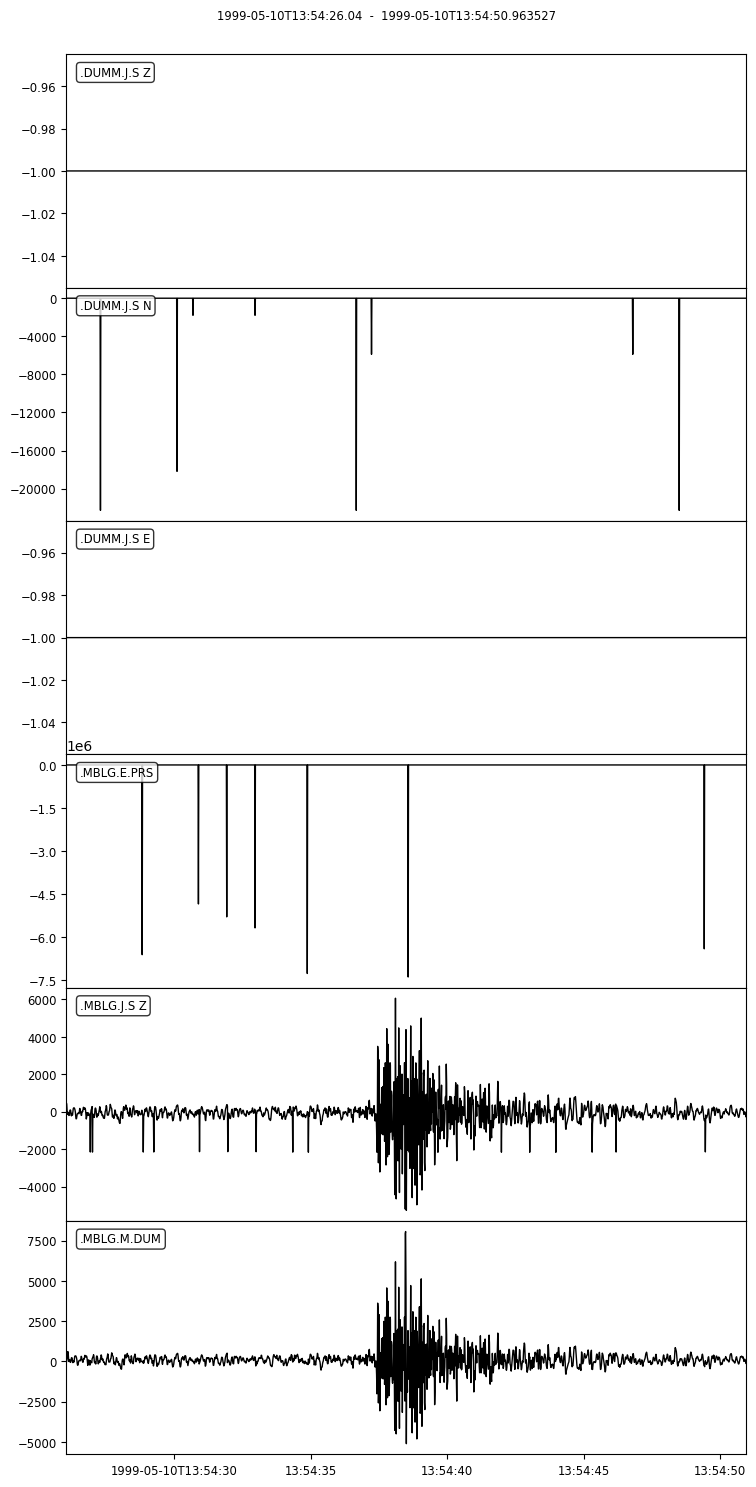

.MBLG.J.S Z 75.19
.MBLG.E.PRS 75.19
.MBLG.M.DUM 75.19


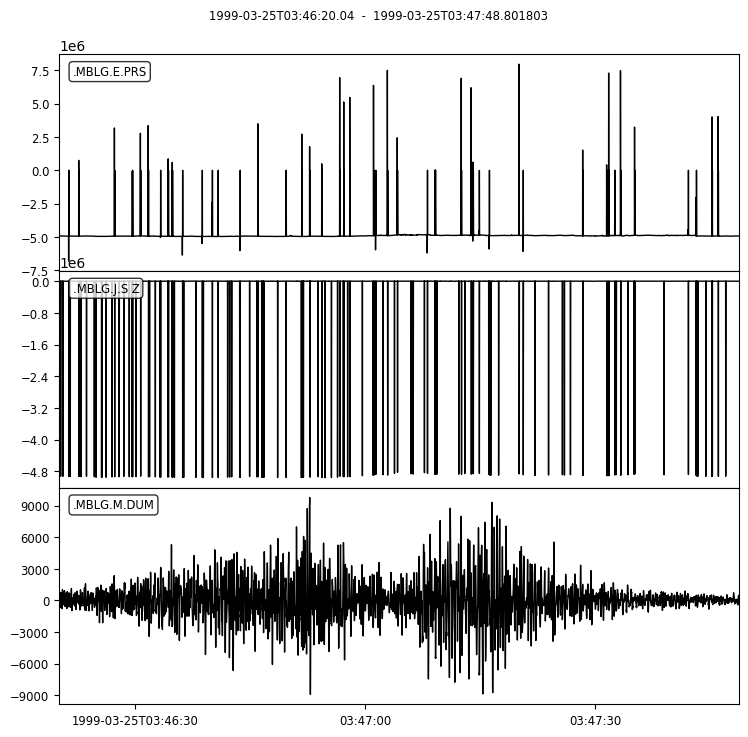

.DUMM.J.S Z 75.19
.DUMM.J.S N 75.19
.DUMM.J.S E 75.19
.MBLG.J.S Z 75.19
.MBLG.M.DUM 75.19
.MBLG.E.PRS 75.19


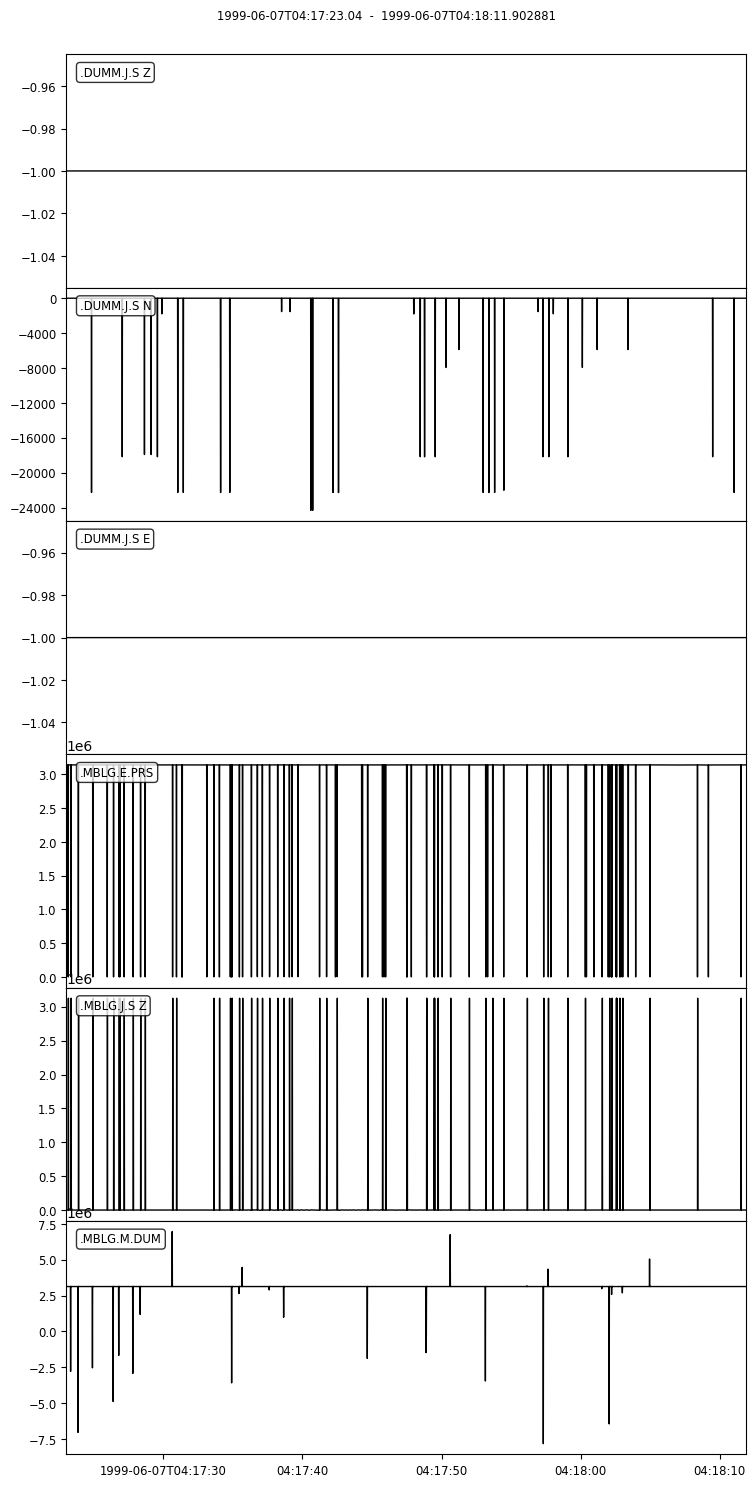

In [11]:
# look for any original_id with DUM in it
from obspy.core import Stream
wavs = []
for i, row in df.iterrows():
    if 'DUM' in row['original_id']:
        wavs.append(row['wav'])
for wav in list(set(wavs)):        
    st = read(wav)
    stdum = Stream()
    for tr in st:
        if 'DUM' in tr.id or 'MBLG' in tr.id:
            stdum.append(tr)
            print(tr.id, tr.stats.sampling_rate)
    stdum.plot(equal_scale=False);

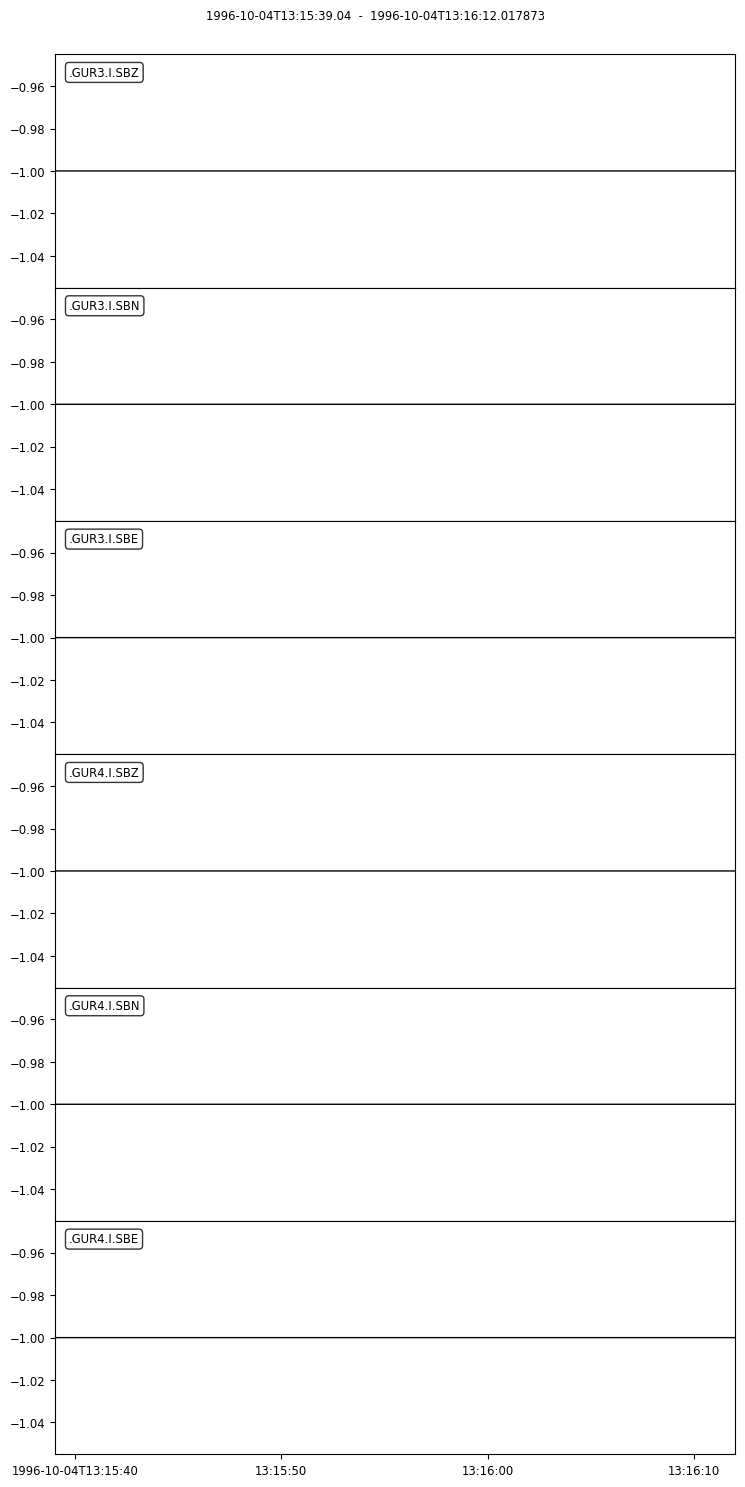

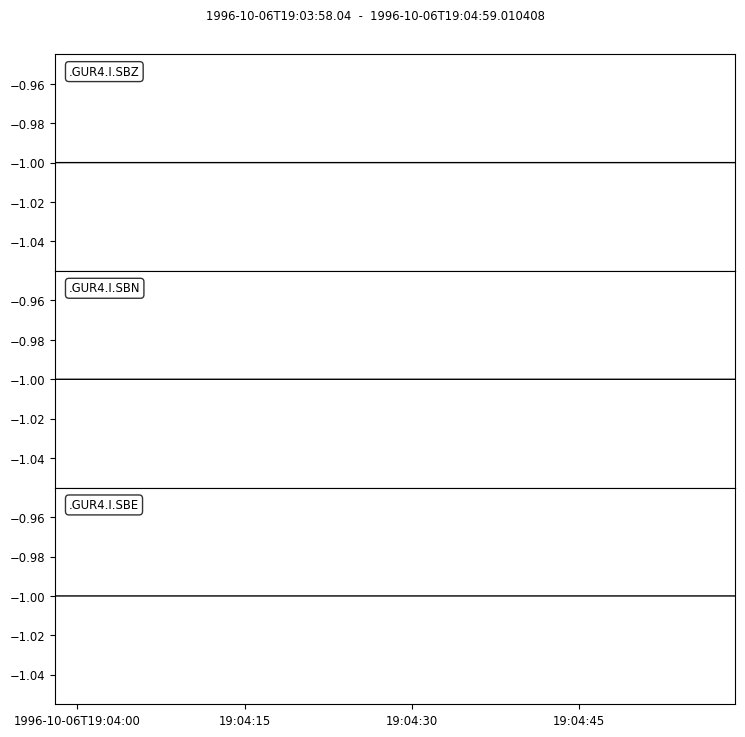

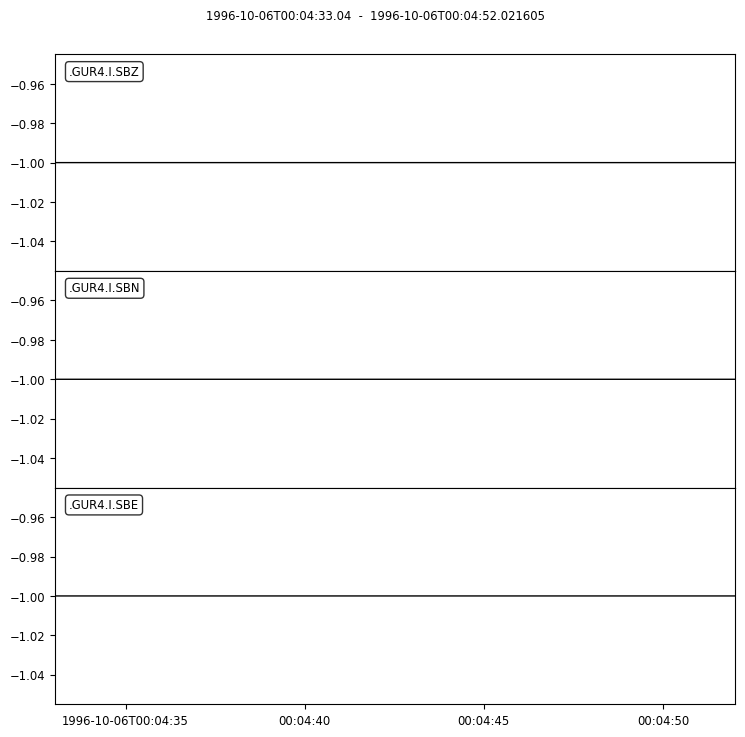

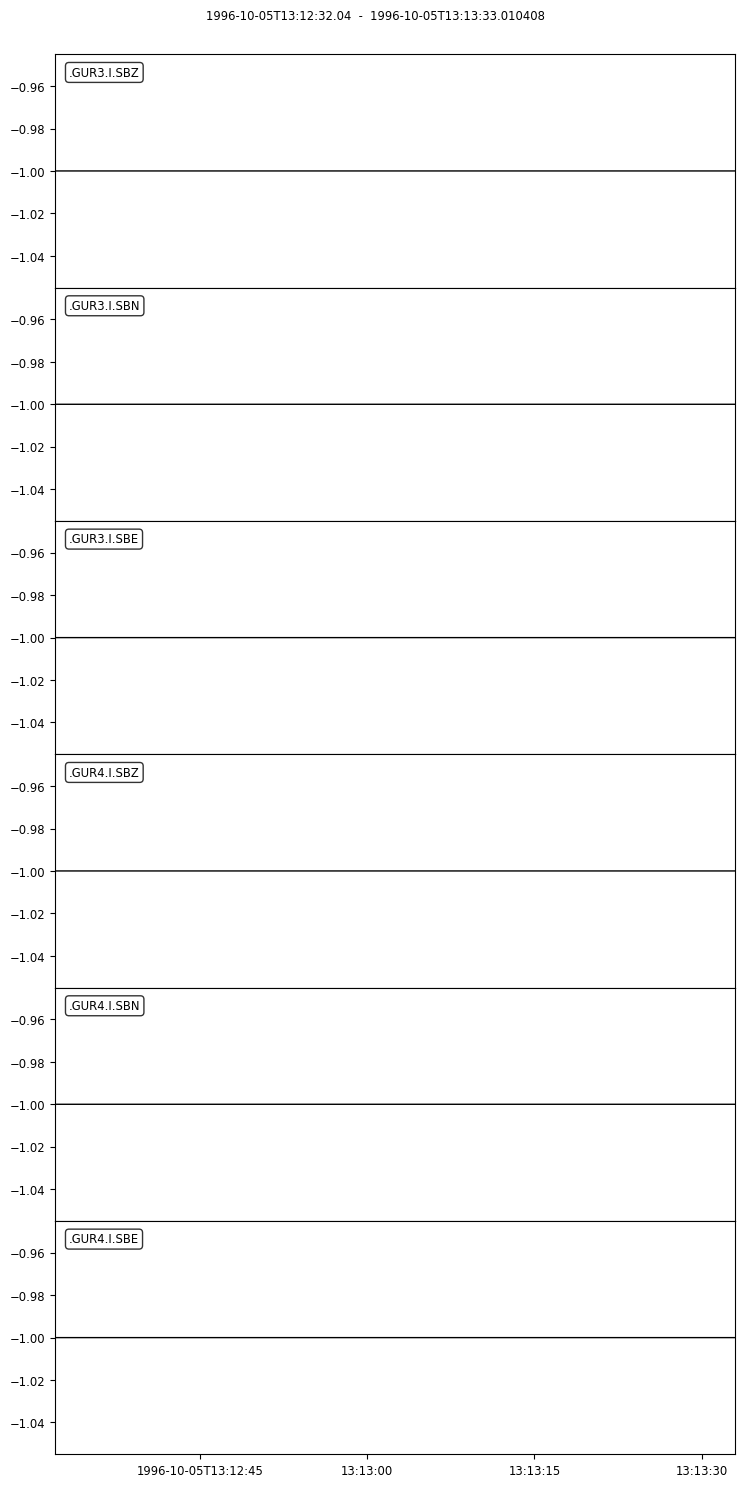

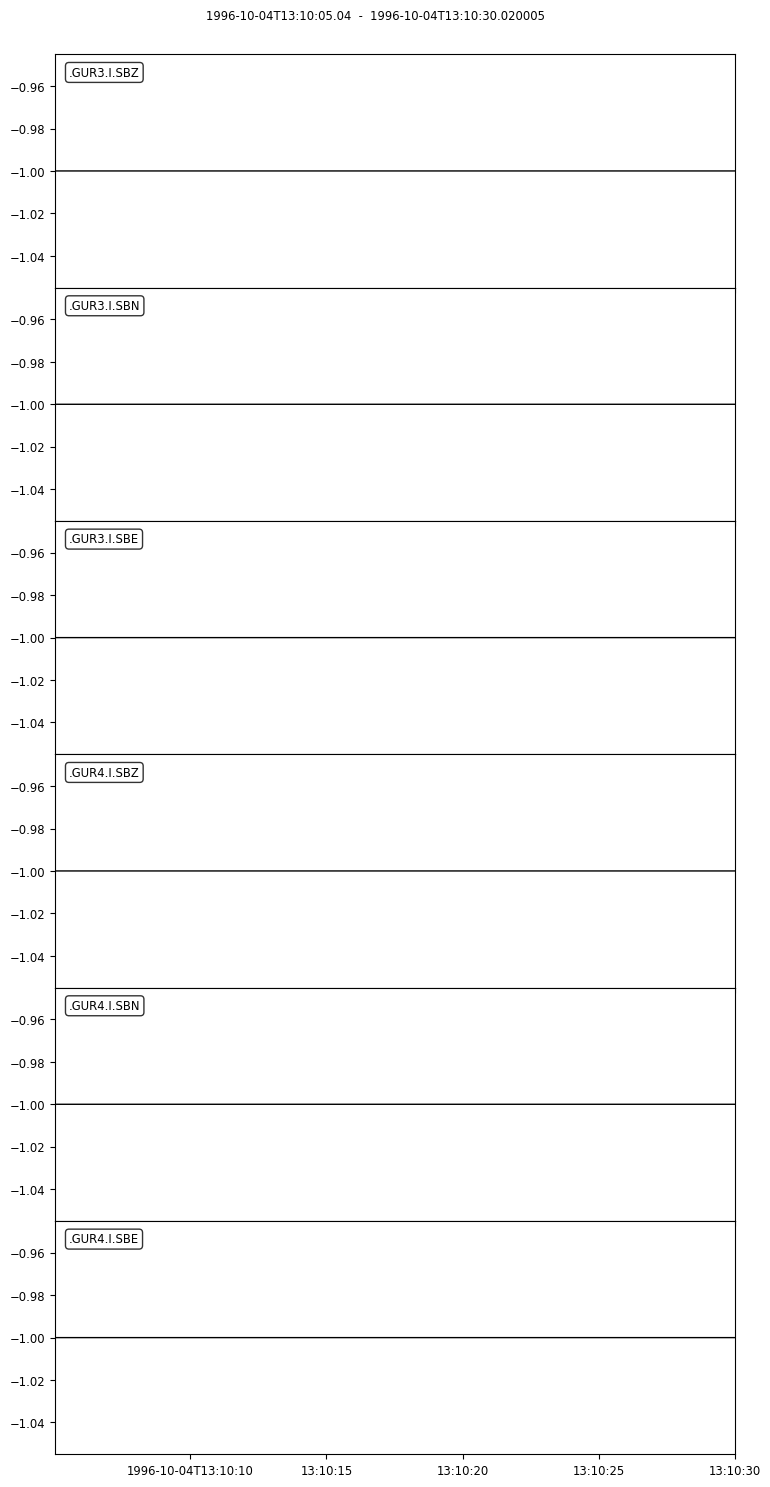

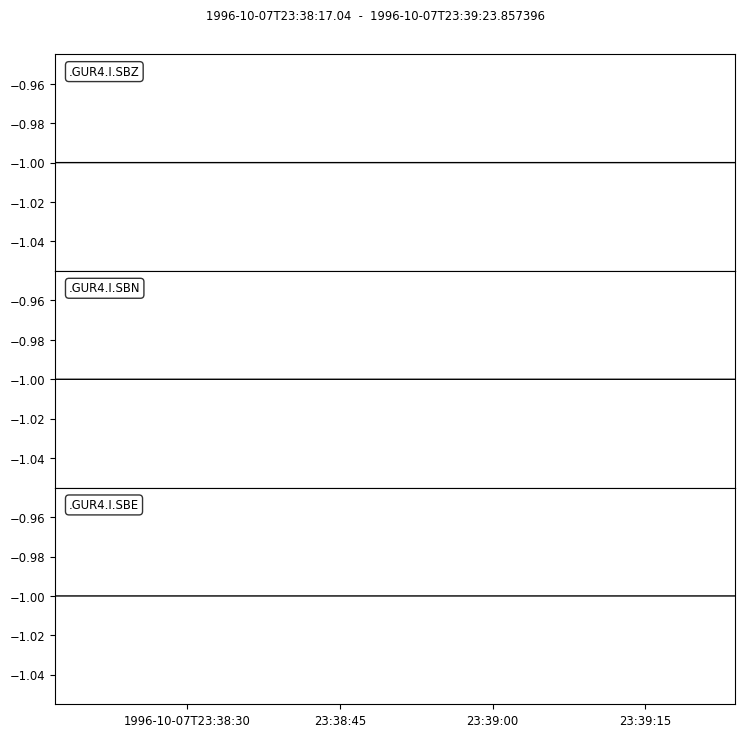

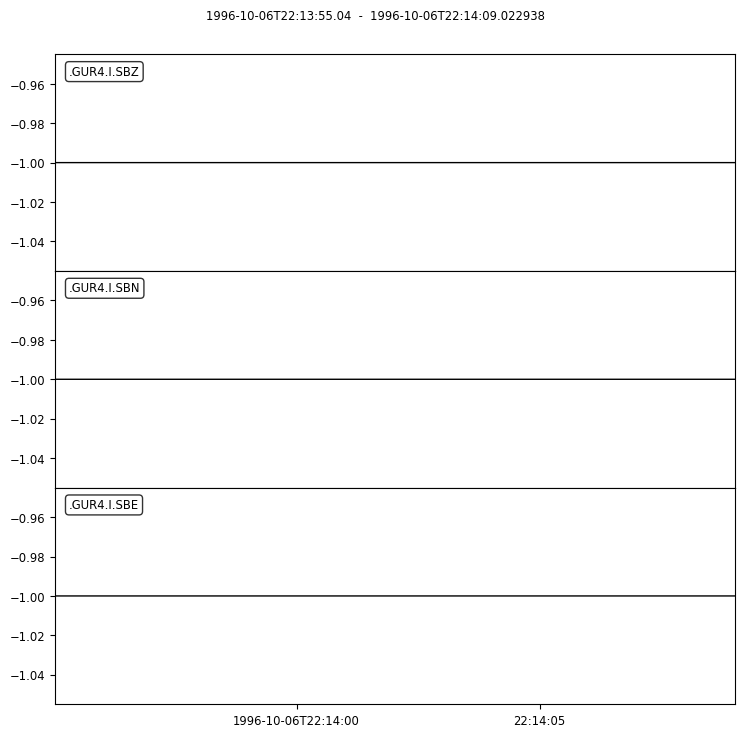

In [5]:
# look for any original_id with DUM in it
from obspy.core import Stream
wavs = []
for i, row in df.iterrows():
    if 'GUR' in row['original_id']:
        wavs.append(row['wav'])
for wav in list(set(wavs)):        
    st = read(wav)
    stdum = Stream()
    for tr in st:
        if 'GUR' in tr.id:
            stdum.append(tr)
    stdum.plot(equal_scale=False);

In [9]:

# look for any original_id with DUM in it
from obspy.core import Stream
wavs = []
for i, row in df.iterrows():
    if 'MBBE.I' in row['original_id']:
        wavs.append(row['wav'])
for wav in list(set(wavs)):        
    st = read(wav)
    stdum = Stream()
    for tr in st:
        if 'MBBE.I' in tr.id:
            stdum.append(tr)
    stdum.plot(equal_scale=False);